## Autoencode single image

49152
[[ 84. 134. 177. ...   6.  15.  14.]]
Neural network output
[[0.01998063 0.01999785 0.0199881  ... 0.0194846  0.02004113 0.0199608 ]]
[[ 84. 134. 177. ...   6.  15.  14.]]


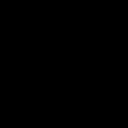

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import pandas as pd
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
import requests
from io import BytesIO

url = "https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg"
    
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.load()
img = img.resize((128,128), Image.ANTIALIAS)
img_array = np.asarray(img)
img_array = img_array.flatten()
img_array = np.array([ img_array ])
img_array = img_array.astype(np.float32)
print(img_array.shape[1])
print(img_array)

model = Sequential()
model.add(Dense(10, input_dim=img_array.shape[1], activation='relu'))
model.add(Dense(img_array.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(img_array,img_array,verbose=0,epochs=20)

print("Neural network output")
pred = model.predict(img_array)
print(pred)
print(img_array)
cols,rows = img.size
img_array2 = pred[0].reshape(rows,cols,3)
img_array2 = img_array2.astype(np.uint8)
img2 = Image.fromarray(img_array2, 'RGB')
img2

## Standarized multiple images before processing

https://www.ucl.ac.uk/news/sites/news/files/styles/large_image/public/quad11apr08_10_cropped_0.jpg?itok=QsihoWMR


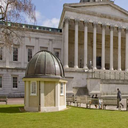

https://www.telegraph.co.uk/content/dam/education/2016/08/12/ucl_trans_NvBQzQNjv4BqpQ0vMMZu_p35I0xEFXLC8WtT0gK_6EfZT336f62EI5U.jpg


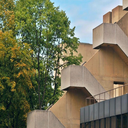

https://www.ucl.ac.uk/news/sites/news/files/styles/large_image/public/Quad25Nov08_05_EDITED.jpg?itok=J60GpzeO


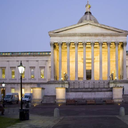

https://pbs.twimg.com/media/EVFuOOTU8AE3VCy.jpg


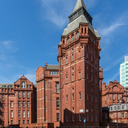

https://expedition.uk.com/wp-content/uploads/2018/11/161214_UCL_Bartlett_011_Credit-Jack-Hobhouse-slider.jpg


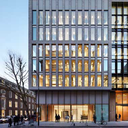

https://d3rcx32iafnn0o.cloudfront.net/Pictures/480xAny/6/1/1/1886611_161214_UCL_Bartlett_002.jpg


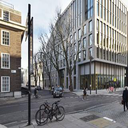

https://www.elsevier.com/__data/assets/image/0003/27453/800px-Rockefeller_Building,_UCL.jpg


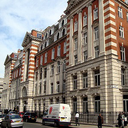

https://s3-eu-west-1.amazonaws.com/hawkinsbrown/images/projects/_articleImage/Project_1410_BartlettWatesHouse_03.jpg?mtime=20161219171017


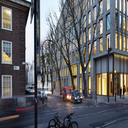

(8, 49152)


In [19]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML


images = [
    "https://www.ucl.ac.uk/news/sites/news/files/styles/large_image/public/quad11apr08_10_cropped_0.jpg?itok=QsihoWMR",
    "https://www.telegraph.co.uk/content/dam/education/2016/08/12/ucl_trans_NvBQzQNjv4BqpQ0vMMZu_p35I0xEFXLC8WtT0gK_6EfZT336f62EI5U.jpg",
    "https://www.ucl.ac.uk/news/sites/news/files/styles/large_image/public/Quad25Nov08_05_EDITED.jpg?itok=J60GpzeO",
    "https://pbs.twimg.com/media/EVFuOOTU8AE3VCy.jpg",
    "https://expedition.uk.com/wp-content/uploads/2018/11/161214_UCL_Bartlett_011_Credit-Jack-Hobhouse-slider.jpg",
    "https://d3rcx32iafnn0o.cloudfront.net/Pictures/480xAny/6/1/1/1886611_161214_UCL_Bartlett_002.jpg",
    "https://www.elsevier.com/__data/assets/image/0003/27453/800px-Rockefeller_Building,_UCL.jpg",
    "https://s3-eu-west-1.amazonaws.com/hawkinsbrown/images/projects/_articleImage/Project_1410_BartlettWatesHouse_03.jpg?mtime=20161219171017"    
]


def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img
    
x = [] 
    
for url in images:
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.load()
    img = make_square(img)
    img = img.resize((128,128), Image.ANTIALIAS)
    print(url)
    display(img)
    img_array = np.asarray(img)
    img_array = img_array.flatten()
    img_array = img_array.astype(np.float32)
    img_array = (img_array-128)/128
    x.append(img_array)
    

x = np.array(x)

print(x.shape)

## Autoencode 8 images

Creating/Training neural network
Score neural network
[ 0.29588136  0.20290294  0.2500145  ...  0.18634224  0.16295704
 -0.57730454]


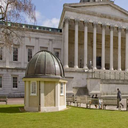

[-0.13264328 -0.03873953 -0.4831104  ... -0.70260465 -0.65569043
 -0.6476352 ]


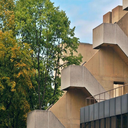

[-0.00086873  0.14923637  0.6154978  ... -0.698781   -0.6984291
 -0.646849  ]


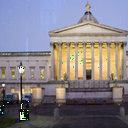

[-0.4998248   0.03791861  0.55008435 ... -0.7096112  -0.7877066
 -0.7922758 ]


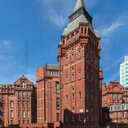

[ 0.2660344   0.5849382   0.8075011  ... -0.41958547 -0.45874697
 -0.28365946]


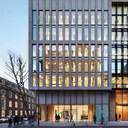

[ 0.5702718   0.56116104  0.57230127 ... -0.04451668 -0.06018969
 -0.01018463]


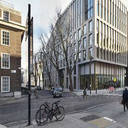

[ 0.7027932   0.8436707   0.9422041  ...  0.06445709 -0.01232359
 -0.17558436]


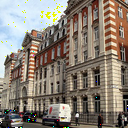

[-0.6093589  -0.6101072  -0.63054836 ... -0.45189065 -0.3718368
 -0.2425709 ]


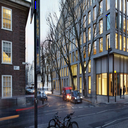

In [10]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
from sklearn import metrics
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython.display import display, HTML 

# Fit regression DNN model.
print("Creating/Training neural network")
model = Sequential()
m
model.add(Dense(x.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,x,verbose=0,epochs=1000)

print("Score neural network")
pred = model.predict(x)

cols,rows = img.size
for i in range(len(pred)):
    print(pred[i])
    img_array2 = pred[i].reshape(rows,cols,3)
    img_array2 = (img_array2*128)+128
    img_array2 = img_array2.astype(np.uint8)
    img2 = Image.fromarray(img_array2, 'RGB')
    display(img2)

# Adding random noises to a single image

Rows: 576, Cols: 768
(576, 768, 3)


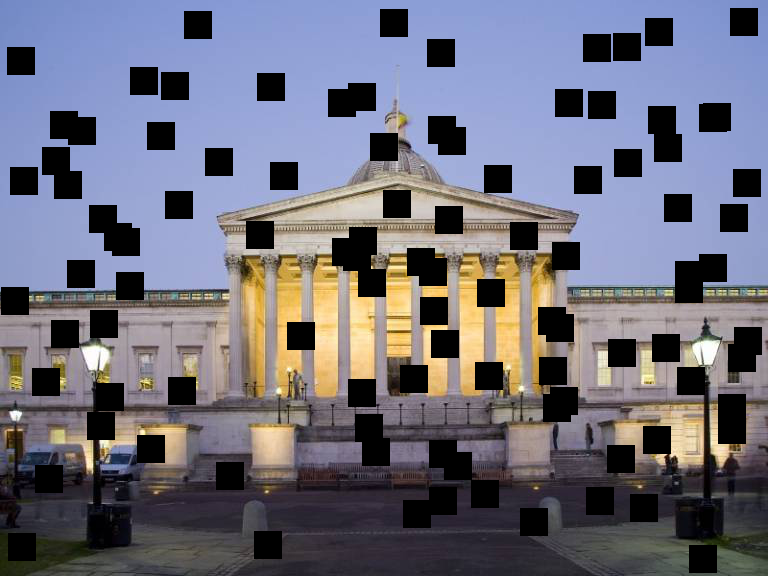

In [20]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO

%matplotlib inline


def add_noise(a):
    a2 = a.copy()
    rows = a2.shape[0]
    cols = a2.shape[1]
    s = int(min(rows,cols)/20) # size of spot is 1/20 of smallest dimension
    
    for i in range(100):
        x = np.random.randint(cols-s)
        y = np.random.randint(rows-s)
        a2[y:(y+s),x:(x+s)] = 0
        
    return a2

url = "https://www.ucl.ac.uk/news/sites/news/files/styles/large_image/public/Quad25Nov08_05_EDITED.jpg?itok=J60GpzeO"

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.load()

img_array = np.asarray(img)
rows = img_array.shape[0]
cols = img_array.shape[1]

print("Rows: {}, Cols: {}".format(rows,cols))

# Create new image
img2_array = img_array.astype(np.uint8)
print(img2_array.shape)
img2_array = add_noise(img2_array)
img2 = Image.fromarray(img2_array, 'RGB')
img2

# Adding noises and Denoising by auto encoder

https://www.ucl.ac.uk/news/sites/news/files/styles/large_image/public/quad11apr08_10_cropped_0.jpg?itok=QsihoWMR


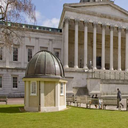

https://www.telegraph.co.uk/content/dam/education/2016/08/12/ucl_trans_NvBQzQNjv4BqpQ0vMMZu_p35I0xEFXLC8WtT0gK_6EfZT336f62EI5U.jpg


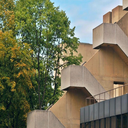

https://www.ucl.ac.uk/news/sites/news/files/styles/large_image/public/Quad25Nov08_05_EDITED.jpg?itok=J60GpzeO


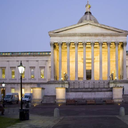

https://pbs.twimg.com/media/EVFuOOTU8AE3VCy.jpg


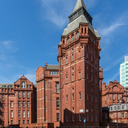

https://expedition.uk.com/wp-content/uploads/2018/11/161214_UCL_Bartlett_011_Credit-Jack-Hobhouse-slider.jpg


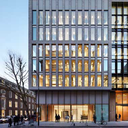

https://d3rcx32iafnn0o.cloudfront.net/Pictures/480xAny/6/1/1/1886611_161214_UCL_Bartlett_002.jpg


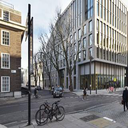

https://www.elsevier.com/__data/assets/image/0003/27453/800px-Rockefeller_Building,_UCL.jpg


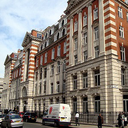

https://s3-eu-west-1.amazonaws.com/hawkinsbrown/images/projects/_articleImage/Project_1410_BartlettWatesHouse_03.jpg?mtime=20161219171017


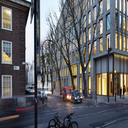

(80, 49152)
(80, 49152)


In [21]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML

images = [
    "https://www.ucl.ac.uk/news/sites/news/files/styles/large_image/public/quad11apr08_10_cropped_0.jpg?itok=QsihoWMR",
    "https://www.telegraph.co.uk/content/dam/education/2016/08/12/ucl_trans_NvBQzQNjv4BqpQ0vMMZu_p35I0xEFXLC8WtT0gK_6EfZT336f62EI5U.jpg",
    "https://www.ucl.ac.uk/news/sites/news/files/styles/large_image/public/Quad25Nov08_05_EDITED.jpg?itok=J60GpzeO",
    "https://pbs.twimg.com/media/EVFuOOTU8AE3VCy.jpg",
    "https://expedition.uk.com/wp-content/uploads/2018/11/161214_UCL_Bartlett_011_Credit-Jack-Hobhouse-slider.jpg",
    "https://d3rcx32iafnn0o.cloudfront.net/Pictures/480xAny/6/1/1/1886611_161214_UCL_Bartlett_002.jpg",
    "https://www.elsevier.com/__data/assets/image/0003/27453/800px-Rockefeller_Building,_UCL.jpg",
    "https://s3-eu-west-1.amazonaws.com/hawkinsbrown/images/projects/_articleImage/Project_1410_BartlettWatesHouse_03.jpg?mtime=20161219171017"    
]


def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img
    
x = []    
y = []
loaded_images = []
    
for url in images:
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.load()
    img = make_square(img)
    img = img.resize((128,128), Image.ANTIALIAS)
    
    loaded_images.append(img)
    print(url)
    display(img)
    for i in range(10):
        img_array = np.asarray(img)
        img_array_noise = add_noise(img_array)
        
        img_array = img_array.flatten()
        img_array = img_array.astype(np.float32)
        img_array = (img_array-128)/128
        
        img_array_noise = img_array_noise.flatten()
        img_array_noise = img_array_noise.astype(np.float32)
        img_array_noise = (img_array_noise-128)/128
        
        x.append(img_array_noise)
        y.append(img_array)
    
x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)

In [17]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
from sklearn import metrics
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython.display import display, HTML 

# Fit regression DNN model.
print("Creating/Training neural network")
model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(x.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=1,epochs=20)

print("Neural network trained")

Creating/Training neural network
Train on 80 samples
Epoch 1/20
80/80 [==============================] - 0s 5ms/sample - loss: 0.2164
Epoch 2/20
80/80 [==============================] - 0s 2ms/sample - loss: 0.1765
Epoch 3/20
80/80 [==============================] - 0s 2ms/sample - loss: 0.1510
Epoch 4/20
80/80 [==============================] - 0s 2ms/sample - loss: 0.1270
Epoch 5/20
80/80 [==============================] - 0s 2ms/sample - loss: 0.0964
Epoch 6/20
80/80 [==============================] - 0s 3ms/sample - loss: 0.0695
Epoch 7/20
80/80 [==============================] - 0s 2ms/sample - loss: 0.0486
Epoch 8/20
80/80 [==============================] - 0s 2ms/sample - loss: 0.0345
Epoch 9/20
80/80 [==============================] - 0s 2ms/sample - loss: 0.0230
Epoch 10/20
80/80 [==============================] - 0s 2ms/sample - loss: 0.0141
Epoch 11/20
80/80 [==============================] - 0s 2ms/sample - loss: 0.0095
Epoch 12/20
80/80 [==============================] - 0

*** Trial 1
With noise:


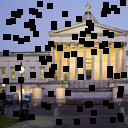

After auto encode noise removal


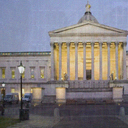

*** Trial 2
With noise:


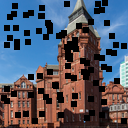

After auto encode noise removal


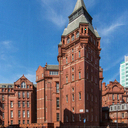

*** Trial 3
With noise:


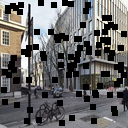

After auto encode noise removal


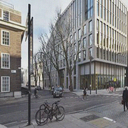

*** Trial 4
With noise:


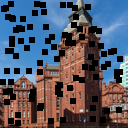

After auto encode noise removal


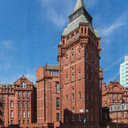

*** Trial 5
With noise:


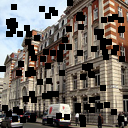

After auto encode noise removal


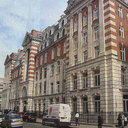

*** Trial 6
With noise:


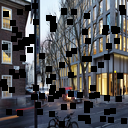

After auto encode noise removal


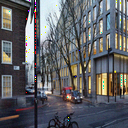

*** Trial 7
With noise:


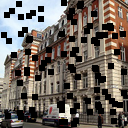

After auto encode noise removal


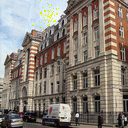

*** Trial 8
With noise:


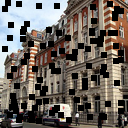

After auto encode noise removal


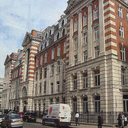

*** Trial 9
With noise:


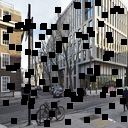

After auto encode noise removal


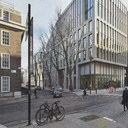

*** Trial 10
With noise:


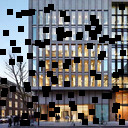

After auto encode noise removal


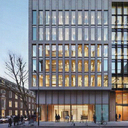

In [18]:
import utils

for z in range(10):
    print("*** Trial {}".format(z+1))
    
    # Choose random image
    i = np.random.randint(len(loaded_images))
    img = loaded_images[i]
    img_array = np.asarray(img)
    cols, rows = img.size

    # Add noise
    img_array_noise = add_noise(img_array)    

    #Display noisy image
    img2 = img_array_noise.astype(np.uint8)
    img2 = Image.fromarray(img2, 'RGB')
    print("With noise:")
    display(img2)

    # Present noisy image to auto encoder
    img_array_noise = img_array_noise.flatten()
    img_array_noise = img_array_noise.astype(np.float32)
    img_array_noise = (img_array_noise-128)/128
    img_array_noise = np.array([img_array_noise])
    pred = model.predict(img_array_noise)[0]

    # Display neural result
    img_array2 = pred.reshape(rows,cols,3)
    img_array2 = (img_array2*128)+128
    img_array2 = img_array2.astype(np.uint8)
    img2 = Image.fromarray(img_array2, 'RGB')
    print("After auto encode noise removal")
    display(img2)